## Тестирование

Здесь будем тестировать решение многомерной задачи на собственные значения на
реальных тензорах. В данном случае будем искать собственные значения
Гамильтонианов — матриц, определяемых следующим образом

\begin{align*}
    &H = \sum_{i=1}^{d-1} \mathbf{S}_i\mathbf{S}_{i+1} =
    \sum_{i=1}^{d-1} \left( S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y + S_i^ZS_{i+1}^Z \right)\\
    &S_i^{\{X, Y, Z\}} = \underbrace{I_2 \otimes \ldots \otimes \underbrace{S_{\{X, Y, Z\}}}_{i-\mathrm{th}} \otimes \ldots \otimes I_2}_{d\ \ \mathrm{factors}}
\end{align*}

Матрицы $S_{\{X, Y, Z\}}$ имеют вид

\begin{align*}
&S_X =
\frac{1}{2}
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
&&S_Y =
\frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
&&&S_Z =
\frac{1}{2}
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
\end{align*}

Первое что можно заметить, это то, что матрицы вида $S_Y$ содержат комплексные
элементы, что довольно грустно, т.к. с комплексной арифметикой работать не хочется.
Посмотрим на матрицу $S_i^YS_{i+1}^Y$ поближе:

\begin{align*}
    S_i^YS_{i+1}^Y = &(\underbrace{I_2 \otimes \ldots \otimes S_Y \otimes I_2 \otimes \ldots \otimes I_2}_{A} \otimes I_2)
    (\underbrace{I_2 \otimes \ldots \otimes I_2 \otimes S_Y \otimes \ldots \otimes I_2}_{B} \otimes I_2) =\\
    =& AB \otimes I_2 = \Diamond
\end{align*}

После некоторого количества таких развёрток, использования свойств кронекерова
произведения и слияния $\underbrace{I_2 \otimes \ldots \otimes I_2}_{i\ \ \mathrm{times}} = I_{2^i}$ получаем такую картину:

\begin{align*}
    \Diamond =& A'B' \otimes \widetilde{I} = (A'' \otimes I)(B'' \otimes S_Y) \otimes \widetilde{I} =
    A''B'' \otimes S_Y \otimes \widetilde{I} =\\
    =& (\widetilde{\widetilde{A}} \otimes S_Y)(\widetilde{\widetilde{B}} \otimes I)
    \otimes S_Y \otimes \widetilde{I} = \widetilde{\widetilde{A}}\widetilde{\widetilde{B}}
    \otimes S_Y \otimes S_Y \otimes \widetilde{I} =
    \widetilde{\widetilde{I}} \otimes S_Y \otimes S_Y \otimes \widetilde{I}
\end{align*}

Теперь посмотрим на матрицу $S_Y \otimes S_Y$:

\begin{align*}
    &S_Y \otimes S_Y = \frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
\otimes
\frac{1}{2}
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix} = \frac{1}{4}
\begin{pmatrix}
0 & 0 & 0 & -1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
-1 & 0 & 0 & 0\\
\end{pmatrix}
\end{align*}

О как здорово, получается матрица $S_i^YS_{i+1}^Y$ целиком вещественная,
несмотря на то, что множители комплексные. Значит можно придумать, как
считать Гамильтониан не прибегая к комплексной арифметике. На худой конец
можно его построить с использованием комплексной арифметики, а потом
комплексную часть у всех элементов обрезать, т.к. очевидно, что Гамильтониан
тоже целиком вещественный.

Теперь поближе посмотрим на выражение $S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y$:

\begin{align*}
    S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y =&
    \widetilde{\widetilde{I}} \otimes S_X \otimes S_X \otimes \widetilde{I}
    + \widetilde{\widetilde{I}} \otimes S_Y \otimes S_Y \otimes \widetilde{I} =\\
    =&
    \widetilde{\widetilde{I}} \otimes (S_X \otimes S_X + S_Y \otimes S_Y) \otimes \widetilde{I}\\
\end{align*}

\begin{align*}
    &S_X \otimes S_X = \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & 1\\
        0 & 0 & 1 & 0\\
        0 & 1 & 0 & 0\\
        1 & 0 & 0 & 0\\
    \end{pmatrix}
    &&S_Y \otimes S_Y = \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & -1\\
        0 & 0 & 1 & 0\\
        0 & 1 & 0 & 0\\
        -1 & 0 & 0 & 0\\
    \end{pmatrix}
\end{align*}

\begin{align*}
    S_X \otimes S_X +& S_Y \otimes S_Y = \frac{1}{4}
    \begin{pmatrix}
        0 & 0 & 0 & 0\\
        0 & 0 & 2 & 0\\
        0 & 2 & 0 & 0\\
        0 & 0 & 0 & 0\\
    \end{pmatrix}
    =\frac{1}{2}
    \begin{pmatrix}
        0 & 0 & 0 & 0\\
        0 & 0 & 1 & 0\\
        0 & 1 & 0 & 0\\
        0 & 0 & 0 & 0\\
    \end{pmatrix} =\\\\
    =& \frac{1}{2}
    \begin{pmatrix}
    0 & E_3\\
    E_2 & 0
    \end{pmatrix} =
    \frac{1}{2}
    \begin{pmatrix}
    0 & E_3\\
    0 & 0
    \end{pmatrix}
    +
    \frac{1}{2}
    \begin{pmatrix}
    0 & 0\\
    E_2 & 0
    \end{pmatrix} =\\\\
    &= \frac{1}{2}\left( E_2 \otimes E_3 + E_3 \otimes E_2 \right)
\end{align*}

Где $E_3 (E_2)$ — третья (вторая) матричная единица. Теперь можно развернуть выражение в обратную
сторону и написать новое определение Гамильтониана:

\begin{align*}
    H =& \sum_{i=1}^{d-1} \left( S_i^XS_{i+1}^X + S_i^YS_{i+1}^Y + S_i^ZS_{i+1}^Z \right) =\\
    =& \sum_{i=1}^{d-1} \left( \frac{1}{2}\left(\widetilde{\widetilde{I}} \otimes \left( E_2 \otimes E_3 + E_3 \otimes E_2 \right) \otimes \widetilde{I} \right) + S_i^ZS_{i+1}^Z\right) =\\
    =& \sum_{i=1}^{d-1} \left( \frac{1}{2}\left(\widetilde{\widetilde{I}} \otimes E_2 \otimes E_3 \otimes \widetilde{I}\right) +
    \frac{1}{2}\left(\widetilde{\widetilde{I}} \otimes E_3 \otimes E_2 \otimes \widetilde{I}\right) + S_i^ZS_{i+1}^Z\right) =\\
    =& \sum_{i=1}^{d-1} \left(  \frac{1}{2}S_i^{\{2\}}S_{i+1}^{\{3\}} +  \frac{1}{2}S_i^{\{3\}}S_{i+1}^{\{2\}} + S_i^ZS_{i+1}^Z \right)
\end{align*}

\begin{align*}
&S_i^{\{2\}} = \left(\widetilde{\widetilde{I}} \otimes E_2 \otimes I_2 \otimes \widetilde{I}\right)
&&S_i^{\{3\}} = \left(\widetilde{\widetilde{I}} \otimes E_3 \otimes I_2 \otimes \widetilde{I}\right)
\end{align*}

Такое можно уже запрограммировать. Остаётся придумать, как представить Гамильтониан
в виде TT-тензора.

In [29]:
import jax
import jax.numpy as jnp
import ttax
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def tt_kron(a : ttax.base_class.TTMatrix, b : ttax.base_class.TTMatrix):
    a_cores = a.tt_cores
    if type(a_cores) is list:
        a_cores = jnp.array(a_cores)
    b_cores = b.tt_cores
    if type(b_cores) is list:
        b_cores = jnp.array(b_cores)
    return ttax.base_class.TTMatrix(jnp.concatenate((a_cores, b_cores)))

def apply_operator(operator_tt : ttax.base_class.TTMatrix, vec_tt : ttax.base_class.TT):
    return ttax.base_class.TT([
        jnp.einsum('abic,eig->aebcg', operator_tt.tt_cores[i], vec_tt.tt_cores[i]).reshape((
            operator_tt.tt_cores[i].shape[0] * vec_tt.tt_ranks[i], operator_tt.tt_cores[i].shape[1],
            operator_tt.tt_cores[i].shape[3] * vec_tt.tt_ranks[i + 1]), order="F",
        )
        for i in range(len(vec_tt.tt_cores))
    ])

jited_apply_operator = jax.jit(apply_operator)
jited_tt_kron = jax.jit(tt_kron)

@jax.jit
def transpose(operator_tt : ttax.base_class.TTMatrix):
  cores = [jnp.einsum('aijb->ajib', operator_tt.tt_cores[i])
             for i in range(len(operator_tt.tt_cores))]
  return ttax.base_class.TTMatrix(cores)

def prj(what, where):
  f = lambda x:ttax.flat_inner(what, x)
  return ttax.autodiff.grad(f)(where)

In [20]:
def gen_S_1d(S, i, d):
    E = ttax.base_class.TTMatrix(jnp.array([jnp.eye(2).reshape((1,2,2,1), order="F")]))
    res = S
    for j in range(i):
        res = jited_tt_kron(E, res)
    for j in range(d - i - 1):
        res = jited_tt_kron(res, E)
    return ttax.round(res, 5)

def gen_Hamiltonian(d):
    SZ = jnp.array([[1, 0], [0, -1]])
    E2 = jnp.array([[0,1],[0,0]])
    E3 = E2.T
    SZ = 0.5 * ttax.base_class.TTMatrix([SZ.reshape((1,2,2,1), order="F")])
    E2 = ttax.base_class.TTMatrix([E2.reshape((1,2,2,1), order="F")])
    E3 = ttax.base_class.TTMatrix([E3.reshape((1,2,2,1), order="F")])
    SSZ = [gen_S_1d(SZ, i, d) for i in range(d)]
    SS2 = [gen_S_1d(E2, i, d) for i in range(d)]
    SS3 = [gen_S_1d(E3, i, d) for i in range(d)]
    zero_tensor = ttax.base_class.TTMatrix([jnp.zeros((1, 2, 2, 1))])
    H = gen_S_1d(zero_tensor, 0, d)
    for i in range(d - 1):
        H += 0.5 * (SS2[i] @ SS3[i + 1] + SS3[i] @ SS2[i + 1]) + SSZ[i] @ SSZ[i + 1]
    return H

In [21]:
H = gen_Hamiltonian(2)
print(ttax.full(H))

[[ 0.25        0.          0.          0.        ]
 [ 0.         -0.25        0.4999999   0.        ]
 [ 0.          0.49999997 -0.24999999  0.        ]
 [ 0.          0.          0.          0.24999999]]


По крайней мере не сложно проверить, что это правильный ответ.

Алгоритм Riemann CG

In [37]:
norm = lambda x: jnp.sqrt(ttax.flat_inner(ttax.orthogonalize(x), ttax.orthogonalize(x)))
fused_norm = jax.jit(norm)
make_rayleigh = lambda A: lambda x: ttax.flat_inner(x, A(x)) / ttax.flat_inner(x, x)
residual = lambda A, x, eig: fused_norm(A(x) + (-eig) * x)

def retraction(T, rk):
    res = ttax.round(T, max_tt_rank=rk)
    res = ttax.orthogonalize(res * (1.0/fused_norm(res)))
    return res

def armijo_backtracking(init, direction, rk, mul, beta, func, x):
    alpha = init
    iters = 0
    optimal_x = retraction(x + alpha * direction, rk)
    armijo_threshold = mul * alpha * fused_norm(direction) ** 2
    fx = func(x)
    while fx - func(optimal_x) < armijo_threshold:
      alpha *= beta
      armijo_threshold *= beta
      iters += 1
      optimal_x = retraction(x + alpha * direction, rk)
      if iters > 40:
        break
    return alpha

def riemannCG(A, init, rk, tol, max_iter = None, debug = False):
  rayleigh = make_rayleigh(A)
  rieman_grad = ttax.autodiff.grad(rayleigh)
  x = init
  iters = 0
  if debug == True:
    print("№\tresidual")
  resid = rieman_grad(x)
  conj = (-1)*resid
  grad_norm = [0, fused_norm(resid)] # [\norm{grad f(x_{i - 1})}, \norm{grad f(x_{i})}]
  residuals = [grad_norm[1]]
  while residuals[-1] > tol:
    alpha = armijo_backtracking(1, conj, rk, -1E-4, 0.5, rayleigh, x)
    x = retraction(x + alpha * conj, rk)
    resid = rieman_grad(x)
    grad_norm = [grad_norm[1], fused_norm(resid)]
    beta = (grad_norm[1] / grad_norm[0]) ** 2
    conj = (-1) * resid + beta * prj(conj, x)
    residuals.append(grad_norm[1])
    if debug == True:
          print("{}\t{}".format(iters, residuals[-1]))
    if (max_iter is not None and iters >= max_iter):
        break
    iters += 1

  return x, residuals

In [23]:
def method_output(operator, vec, residuals):
  eig = make_rayleigh(operator)(vec)
  abs_residual = fused_norm(operator(vec) + (-eig) * vec)
  rel_residual = abs_residual / fused_norm(operator(vec))
  print("Final absolute residual: {};\tFinal relative residual: {}".format(abs_residual, rel_residual))
  print("Start residual*: {}\tEnd residual*: {}".format(residuals[0], residuals[-1]))
  print("Found eigenvalue: {}".format(eig))
  print()
  print("* This residlal may not match to residual in natural sense")

def declare_operator(d, rk):
  # d = 30
  # rk = 20
  H = gen_Hamiltonian(d)
  n = H.raw_tensor_shape[0]
  H_round = ttax.round(H, 5)
  operator = lambda x: jited_apply_operator(H_round, x)
  init = ttax.random.tensor(jax.random.PRNGKey(41), n, tt_rank=rk) * 1E-10
  init *= (1 / fused_norm(init))
  init = ttax.round(init, rk)
  return operator, init, H_round

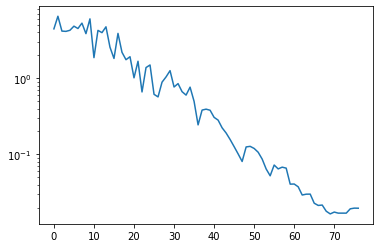

Final absolute residual: 0.011609644629061222;	Final relative residual: 0.0008854661718942225
Start residual*: 4.42476749420166	End residual*: 0.019756507128477097
Found eigenvalue: -13.111333847045898

* This residlal may not match to residual in natural sense


In [24]:
rk = 20
d = 30
operator, init, _ = declare_operator(d, rk)
rayleigh = make_rayleigh(operator)
vec, residuals = riemannCG(operator, init, rk, 1E-2, 75)
plt.semilogy()
plt.show(plt.plot(residuals))
method_output(operator, vec, residuals)

Preconditioned Steepest Ascent с тождественным предобуславливателем

In [25]:
def PSA(A, P, init, tol, rk, max_iter = None, debug = False):
  def rayleigh_ritz(mu, basis):
    Ax = ttax.orthogonalize(A(basis[0]))
    APr = ttax.orthogonalize(A(basis[1]))
    QTAQ = [
            [ttax.flat_inner(basis[0], Ax), ttax.flat_inner(basis[0], APr)],
            [ttax.flat_inner(basis[1], Ax), ttax.flat_inner(basis[1], APr)],
    ]
    QTAQ = jnp.array(QTAQ)
    Ak = jnp.eye(2) - QTAQ
    Ak = jnp.linalg.qr(Ak)[0]
    Descriminant = (Ak[0, 0] + Ak[1, 1]) ** 2 - 4 * (Ak[0, 0] * Ak[1, 1] - Ak[0, 1] * Ak[1, 0])
    if Descriminant < 0:
      print("ERROR D < 0")
      raise Exception()
    t1, t2 = ((Ak[0, 0] + Ak[1, 1]) + jnp.sqrt(Descriminant)) / 2, ((Ak[0, 0] + Ak[1, 1]) - jnp.sqrt(Descriminant)) / 2
    if rayleigh(basis[1] + t1 * basis[0]) > rayleigh(basis[1] + t2 * basis[0]):
      return t1
    else:
      return t2

  rayleigh = lambda x: ttax.flat_inner(x, x) / ttax.flat_inner(x, A(x))
  pencil = lambda x, mu: x + (-mu) * A(x)
  x = retraction(init, rk)
  iters = 0
  if debug == True:
    print("№\tresidual")
  mu = rayleigh(x)
  resid = pencil(x, mu)
  residuals = [fused_norm(resid) / fused_norm(A(x))]
  while residuals[-1] > tol:
    Pr = P(resid)
    tau = rayleigh_ritz(mu, [ttax.orthogonalize(x), ttax.orthogonalize(Pr)])
    x = Pr + tau * x
    norm_coeff = 1 / ttax.flat_inner(ttax.orthogonalize(x), ttax.orthogonalize(A(x)))
    x = ttax.round(x, rk)
    x = ttax.orthogonalize(x * norm_coeff)
    # x = retraction(x, rk)
    mu = rayleigh(x)
    resid = pencil(x, mu)
    residuals.append(fused_norm(resid) / fused_norm(x))
    if debug == True:
            print("{}\t{}".format(iters, residuals[-1]))
    if (max_iter is not None and iters >= max_iter):
        break
    iters += 1

  return x, mu, residuals

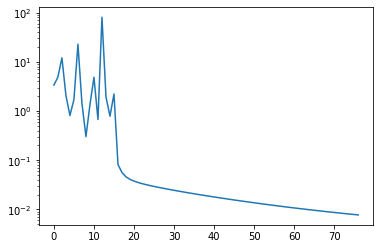

Final absolute residual: 112230.2734375;	Final relative residual: 0.007695159874856472
Start residual*: 3.3542821407318115	End residual*: 0.007695365697145462
Found eigenvalue: -13.051717758178711

* This residlal may not match to residual in natural sense


In [26]:
rk = 20
d = 30
P = lambda x: x
operator, init, _ = declare_operator(d, rk)
vec, mu, residuals = PSA(operator, P, init, 1E-5, rk, 75)
plt.semilogy()
plt.show(plt.plot(residuals))
method_output(operator, vec, residuals)

Local PCG с тождественным предобуславливателем

In [27]:
def local_PCG(A, P, init, tol, rk, max_iter = None, debug = False):
  def rayleigh_ritz(basis):
    APr = A(basis[0])
    Ax = A(basis[1])
    Aold_x = A(basis[2])
    QTAQ = [
            [ttax.flat_inner(basis[0], APr), ttax.flat_inner(basis[0], Ax), ttax.flat_inner(basis[0], Aold_x)],
            [ttax.flat_inner(basis[1], APr), ttax.flat_inner(basis[1], Ax), ttax.flat_inner(basis[1], Aold_x)],
            [ttax.flat_inner(basis[2], APr), ttax.flat_inner(basis[2], Ax), ttax.flat_inner(basis[2], Aold_x)],
    ]
    Ak = jnp.eye(3) - jnp.array(QTAQ)
    Ak = jnp.linalg.qr(Ak)[0]
    vals, vec = scipy.linalg.eigh(Ak)
    vec = vec[:, 0]
    return vec[0] * basis[0] + vec[1] * basis[1] + vec[2] * basis[2]

  rayleigh = lambda x: ttax.flat_inner(x, x) / ttax.flat_inner(x, A(x))
  pencil = lambda x, mu: x + (-mu) * A(x)
  x = retraction(init, rk)
  old_x = x
  iters = 0
  if debug == True:
    print("№\tresidual")
  mu = rayleigh(x)
  resid = pencil(x, mu)
  residuals = [fused_norm(resid) / fused_norm(A(x))]
  while residuals[-1] > tol:
    Pr = P(resid)
    buffer_x = x
    x = rayleigh_ritz([Pr, x, old_x])
    x = retraction(x, rk)
    old_x = buffer_x
    mu = rayleigh(x)
    resid = pencil(x, mu)
    residuals.append(fused_norm(resid) / fused_norm(x))
    if debug == True:
            print("{}\t{}".format(iters, residuals[-1]))
    if (max_iter is not None and iters >= max_iter):
        break
    iters += 1

  return x, mu, residuals

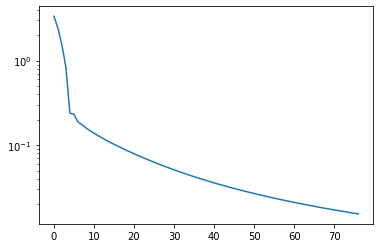

Final absolute residual: 0.1988920420408249;	Final relative residual: 0.015387079678475857
Start residual*: 3.3542821407318115	End residual*: 0.015388699248433113
Found eigenvalue: -12.924384117126465

* This residlal may not match to residual in natural sense


In [30]:
rk = 20
d = 30
P = lambda x: x
operator, init, _ = declare_operator(d, rk)
vec, mu, residuals = local_PCG(operator, P, init, 1E-5, rk, 75)
plt.semilogy()
plt.show(plt.plot(residuals))
method_output(operator, vec, residuals)

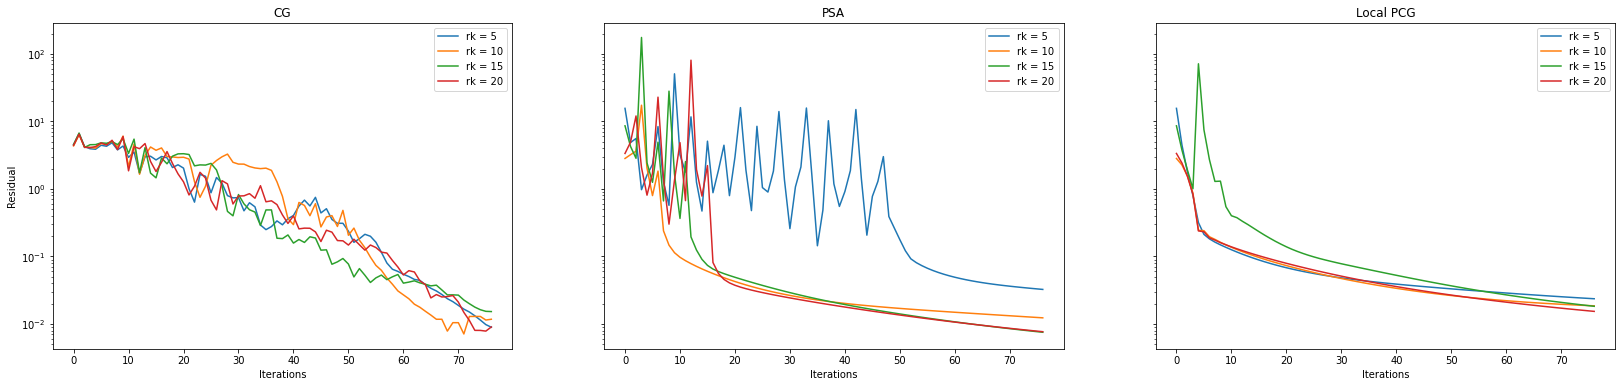

In [38]:
d = 30
P = lambda x: x
iters = 75
tolerance = 1E-8
_, (ax_cg, ax_psa, ax_lpcg) = plt.subplots(1,3,figsize=(28, 6),sharey=True)
ax_cg.set_title("CG")
ax_cg.set_ylabel("Residual")
ax_psa.set_title("PSA")
ax_lpcg.set_title("Local PCG")

for rk in [5, 10, 15, 20]:
  operator, init, _ = declare_operator(d, rk)
  rayleigh = make_rayleigh(operator)
  vec_CG, residuals_CG = riemannCG(operator, init, rk, tolerance, iters)
  vec_PSA, _, residuals_PSA = PSA(operator, P, init, tolerance, rk, iters)
  vec_LPCG, _, residuals_LPCG = local_PCG(operator, P, init, tolerance, rk, iters)
  for residuals, ax in zip([residuals_CG, residuals_PSA, residuals_LPCG], [ax_cg, ax_psa, ax_lpcg]):
    ax.set_xlabel("Iterations")
    ax.semilogy()
    line, = ax.plot(residuals)
    line.set_label('rk = {}'.format(rk))
    ax.legend()
plt.show()